In [47]:
%load_ext rpy2.ipython
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import mode,skew,skewtest

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
import xgboost as xgb

from imblearn.over_sampling import SMOTE

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
data=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Data Science/Datasets/Credit Card Fraud/creditcard.csv')

In [9]:
msk=np.random.randn(len(data))<0.9
train=data[msk]
test=data[~msk]

In [16]:
data.shape,train.shape,test.shape

((284807, 31), (232410, 31), (52397, 31))

In [17]:
train.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0


In [19]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [20]:
#Checking for missing values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

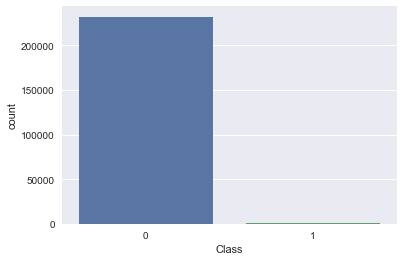

In [21]:
#How are the classes to predict.We will leave the test data and do all our analysis on training data

sns.countplot('Class',data=train)

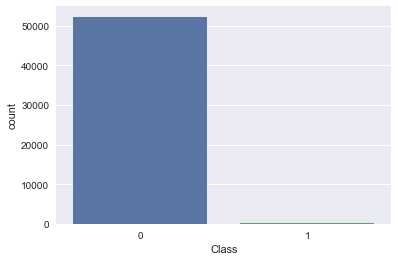

In [22]:
sns.countplot('Class',data=test)

In [23]:
#Since the classes are highly imbalanced, we will have to apply class balancing methods. We will not do SMOTE analysis
#on test data since that is the unseen data on which we will test our models

smote=SMOTE(random_state=42, k=5)
features,labels=smote.fit_sample(train.drop('Class',1),train['Class'])

In [24]:
sampled_data=pd.DataFrame(features,columns=train.drop('Class',1).columns)
sampled_data['Class']=labels

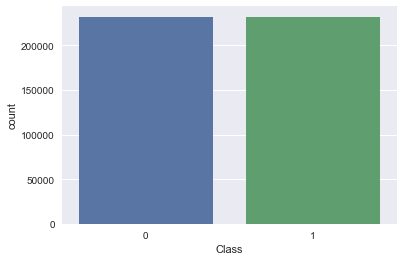

In [25]:
sns.countplot('Class',data=sampled_data)

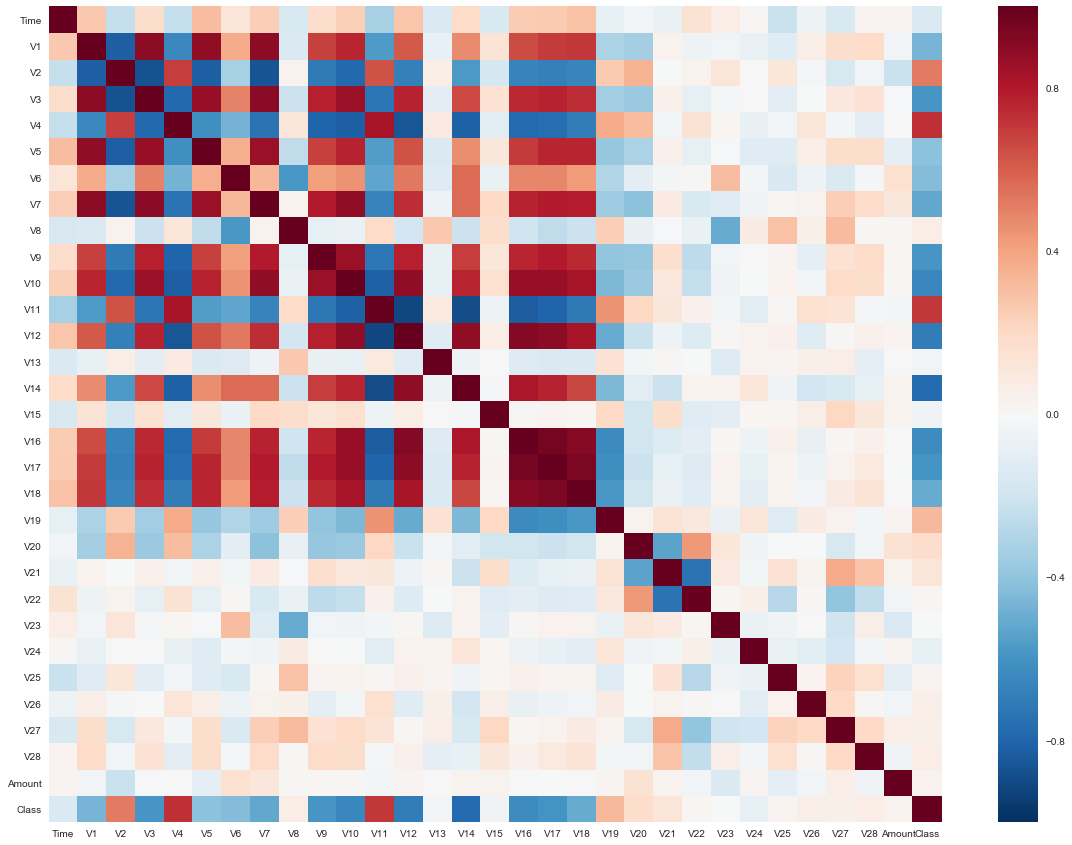

In [26]:
#Now we can analyse the data since the class imbalancing is removed
#Checking if the variables are related to each other or not

plt.figure(figsize=(20,15))
sns.heatmap(sampled_data.corr())

In [27]:
#We see that a lot of our features are correlated with each other especially the features from V1 to V18
#Lets check how the data vary with respect to each other
sampled_data.drop('Class',1).describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,...,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000,464004.000000
mean,87722.742891,-2.590251,1.923229,-3.723827,2.315335,-1.726707,-0.731233,-3.003913,0.342564,-1.332016,...,0.195179,0.330063,0.022424,-0.001303,-0.042682,0.015112,0.030246,0.059494,0.031452,97.359999
std,48353.746797,5.588141,3.683727,6.349665,3.174911,4.225868,1.701444,5.840154,4.729680,2.276603,...,1.053814,2.603514,1.111118,0.927101,0.541073,0.605626,0.454170,0.987594,0.424124,221.640487
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,45647.979035,-3.257941,-0.101052,-5.150816,-0.060523,-1.855876,-1.553848,-3.271172,-0.192583,-2.212479,...,-0.191028,-0.162053,-0.498834,-0.221841,-0.366182,-0.313288,-0.272695,-0.070975,-0.059001,3.686837
50%,79878.500000,-0.865550,1.002522,-1.493037,1.455080,-0.473225,-0.679787,-0.776350,0.171774,-0.789253,...,0.036681,0.161557,0.028015,-0.025447,0.005197,0.028835,-0.010256,0.054459,0.034818,26.021431
75%,134440.096582,0.793261,2.880624,0.272278,4.265402,0.389076,0.029502,0.170341,0.864936,0.082537,...,0.423540,0.649931,0.545964,0.195289,0.357827,0.360242,0.315155,0.410068,0.204159,99.990000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,38.117209,27.202839,10.503090,22.528412,4.584549,7.519589,3.463246,31.612198,33.847808,25691.160000


In [29]:
#Since there are lots of variations in the data we will normalize the data to make it easier for analysis.

scaler=StandardScaler(with_mean=True, with_std=True)
scaled_features=scaler.fit_transform(sampled_data.drop('Class',1))
scaled_sampled_train=pd.DataFrame(scaled_features, index=sampled_data.index,columns=sampled_data.drop('Class',1).columns)
scaled_sampled_train['Class']=sampled_data['Class']

In [30]:
#Applying scaling on the test dataset

scaled_features_test=scaler.fit_transform(test.drop('Class',1))
scaled_test=pd.DataFrame(scaled_features_test, index=test.index, columns=test.drop('Class',1).columns)
scaled_test['Class']=test['Class']

In [31]:
pca=PCA(whiten=True)
pca.fit(scaled_sampled_train.drop('Class',1))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

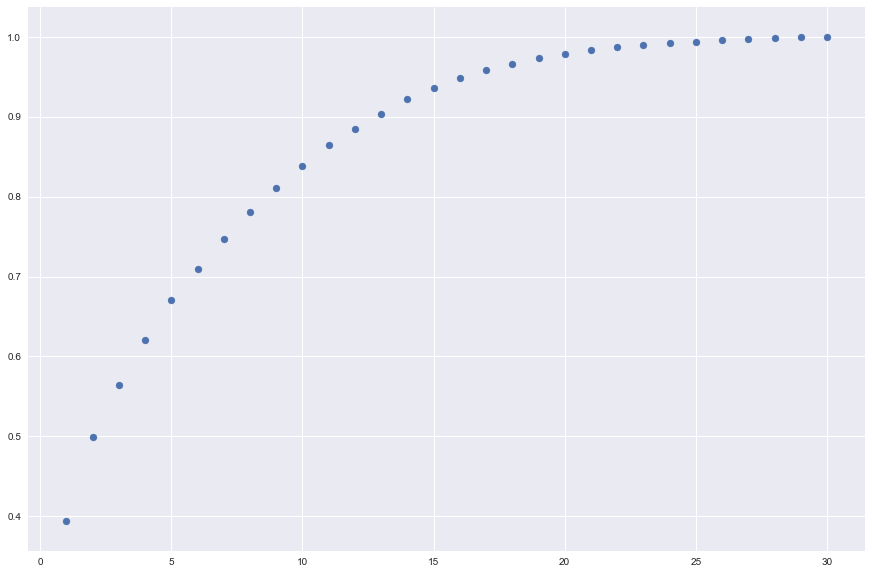

In [32]:
plt.figure(figsize=(15,10))
list_k=range(1,31)
plt.scatter(list_k,pca.explained_variance_ratio_.cumsum())

In [32]:
sampled_data.columns

Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount', u'Class'],
      dtype='object')